In [791]:
#imports
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import image
from skimage import data,io,filters,draw
import time
from scipy.ndimage import convolve
from math import sqrt,atan2,pi,cos,sin
from canny import *

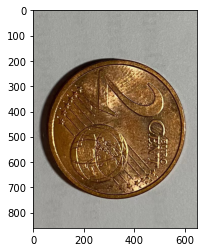

In [954]:
im = plt.imread("../coinimages/2.jpeg")
width = im.shape[1]
height = im.shape[0]
plt.imshow(im)

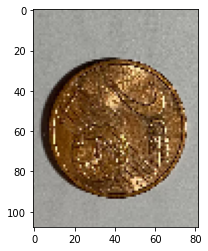

In [955]:
im2 = resolutiondown(im,100)
plt.imshow(im2)

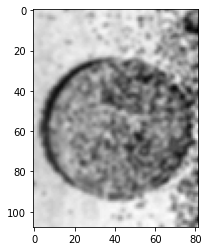

In [956]:
im3 = to_gray(im2)
im3 = to_blur(im3,1)
plt.imshow(im3, cmap = 'gray')

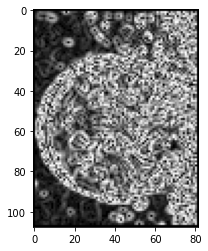

In [957]:
grad,dire = gradient(im3)
plt.imshow(grad, cmap = 'gray')

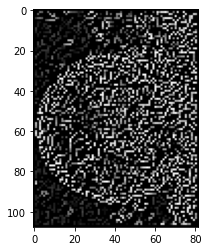

In [958]:
im5 = filter_non_max(grad,dire)
plt.imshow(im5, cmap = 'gray')

(8.0625, 14.421875)

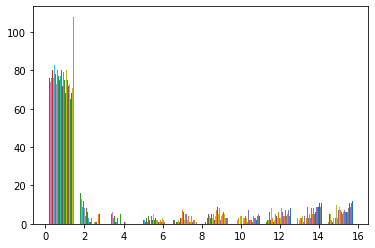

In [959]:
plt.hist(im5)
l,h = np.quantile(im5,[0.8,0.95])
l,h

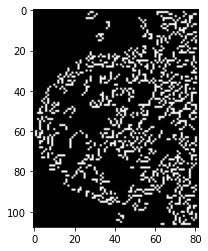

In [960]:
keep = filter_strong_edges(im5,l,h)
plt.imshow(keep, cmap = 'gray')

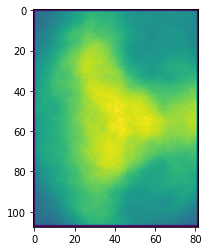

In [961]:
x,y = np.where(keep)
hough = np.zeros(keep.shape)
rmin, rmax = 35,55
r = np.linspace(rmin,rmax, rmax-rmin+1)
steps = rmax*12
points = np.linspace(0,2*pi,steps+1)
ys = np.subtract.outer(y,(np.multiply.outer(r,np.sin(points))).flatten()).astype("int8").flatten()
xs = np.subtract.outer(x,(np.multiply.outer(r,np.cos(points))).flatten()).astype("int8").flatten()


ss1 = np.reshape(xs, (-1,1))
ss2 = np.reshape(ys, (-1,1))
ss3 = np.concatenate((ss1,ss2),axis = 1)
ok = ss3[ss3[:,0] >0]
ok = ok[ok[:,0] < hough.shape[0]-1]
ok = ok[ok[:,1] >0]
ok = ok[ok[:,1] < hough.shape[1]-1]

#hough[ok[:,0],ok[:,1]] += 1
np.add.at(hough, (ok[:,0],ok[:,1]), 1)

plt.imshow(hough)

In [962]:
cx, cy, valmax = np.argmax(hough.max(1)), np.argmax(hough.max(0)), hough.max()
seuilCercle = 0.1
cx, cy, valmax

(50, 41, 1526.0)

In [963]:
test = np.copy(im2)

rayonPlausible = []

for rayon in range(rmin,rmax+1):
    points = np.linspace(0,2*pi,steps)
    ys = (cy-rayon*np.sin(points).flatten()).astype("int8")
    xs = (cx-rayon*np.cos(points).flatten()).astype("int8")

    ss1 = np.reshape(xs, (-1,1))
    ss2 = np.reshape(ys, (-1,1))
    ss3 = np.concatenate((ss1,ss2),axis = 1)
    ok = ss3[ss3[:,0] >0]
    ok = ok[ok[:,0] < hough.shape[0]-1]
    ok = ok[ok[:,1] >0]
    ok = ok[ok[:,1] < hough.shape[1]-1]
    
    if(np.sum(keep[ok[:,0],ok[:,1]])/steps > seuilCercle):
        #test[ok[:,0],ok[:,1]] = 1
        rayonPlausible.append(rayon)

In [964]:
m = int(np.mean(rayonPlausible))
cx,cy,m

(50, 41, 39)

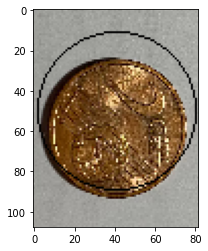

In [965]:
test = np.copy(im2)
rr, cc = draw.circle_perimeter(cx,cy,m)
test[rr,cc] = 1
plt.imshow(test)